## Data exploration

In [318]:
%load_ext autoreload
%autoreload 2
%load_ext autotime

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../src')

from data_processing.mtb_data_provider import MtbDataProvider

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.27 ms


## Read data

In [319]:
def calcFrequency(hZ):
    return (12500/hZ) * 80

time: 719 µs


In [320]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

time: 1.23 ms


In [321]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


time: 1.05 ms


### Acceleration data

#### Gabel

In [326]:
acceleration_data_1_filename = 'neureuth'
acc_frequency = calcFrequency(12500)

time: 714 µs


In [327]:
acc_data_1 = pd.read_csv('../data/raw/' + acceleration_data_1_filename + '_acc_1.csv')
print(acc_data_1.shape)
acc_data_1.head()

(32816, 6)


,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1558198207552,2019-05-18T18:50:07.552,0.00,0.200,-0.865,0.365
1,1558198207632,2019-05-18T18:50:07.632,0.08,0.203,-0.873,0.370
2,1558198207712,2019-05-18T18:50:07.712,0.16,0.202,-0.871,0.368
3,1558198207792,2019-05-18T18:50:07.792,0.24,0.202,-0.871,0.369
4,1558198207872,2019-05-18T18:50:07.872,0.32,0.201,-0.872,0.369


time: 55.3 ms


In [340]:
acc_data_labels = pd.read_csv('../data/raw/' + acceleration_data_1_filename + '_labels.csv')
acc_data_labels.head()

,start,end,difficulty,end in video
0,0,74,4,0:12
1,74,164,0,1:42
2,164,192,3,2:10
3,192,213,1,2:31
4,213,229,4,2:47


time: 8.32 ms


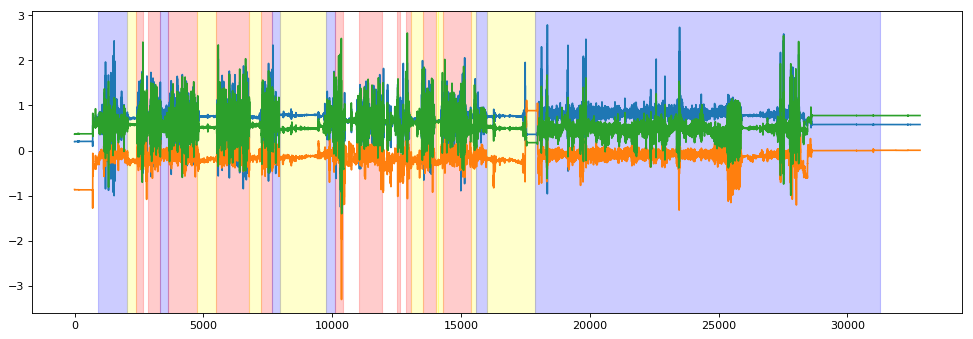

time: 391 ms


In [341]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(acc_data_1["x-axis (g)"])
plt.plot(acc_data_1["y-axis (g)"])
plt.plot(acc_data_1["z-axis (g)"])

#if not acc_data_labels is None:
if 'acc_data_labels' in locals():
    for index, label_row in acc_data_labels.iterrows():
        difficulty = label_row["difficulty"]

        if (difficulty == 0):
            color = 'blue'
        elif (difficulty == 1):
            color = 'red'
        elif (difficulty == 2):
            color = 'black'
        elif (difficulty == 3):
            color = 'yellow'
        else:
            continue

        plt.axvspan((label_row["start"] * 1000)/acc_frequency, (label_row["end"] * 1000)/acc_frequency, color=color, alpha=0.2)

plt.show()


In [ ]:
step = 1
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

fs = 16000.0
lowcut = 100
highcut = 700
plot_seconds = 120
plot_samples = int((plot_seconds * 1000)/acc_frequency)

for i in range(0, 10):
    figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    filtered_data_x = butter_bandpass_filter(acc_data["x-axis (g)"][i*plot_samples : (i + 1)*plot_samples], lowcut, highcut, fs, order=6)
    plt.plot(filtered_data_x)
    plt.show()

#### Helm

In [293]:
acceleration_data_2_filename = 'neureuth_acc_2'

time: 674 µs


In [295]:
acc_data_2 = pd.read_csv('../data/raw/' + acceleration_data_2_filename + '.csv')
print(acc_data_1.shape,acc_data_2.shape)
acc_data_2.head()

(32816, 6) (32638, 6)


,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1558198207526,2019-05-18T18:50:07.526,0.00,0.124,0.748,0.748
1,1558198207606,2019-05-18T18:50:07.606,0.08,0.122,0.771,0.747
2,1558198207686,2019-05-18T18:50:07.686,0.16,0.108,0.769,0.748
3,1558198207766,2019-05-18T18:50:07.766,0.24,0.117,0.766,0.751
4,1558198207846,2019-05-18T18:50:07.846,0.32,0.125,0.764,0.750


time: 58.2 ms


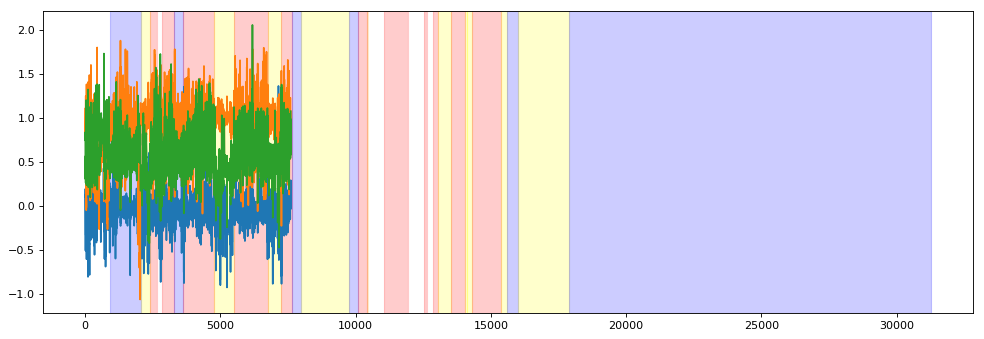

time: 326 ms


In [348]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(acc_data["x-axis (g)"][:7600])
plt.plot(acc_data["y-axis (g)"][:7600])
plt.plot(acc_data["z-axis (g)"][:7600])

#if not acc_data_labels is None:
if 'acc_data_labels' in locals():
    for index, label_row in acc_data_labels.iterrows():
        difficulty = label_row["difficulty"]

        if difficulty == 0:
            color = 'blue'
        elif difficulty == 1:
            color = 'red'
        elif difficulty == 2:
            color = 'black'
        elif difficulty == 3:
            color = 'yellow'
        elif difficulty == 4:
            color = 'white'
        elif difficulty == 5:
            color = 'orange'
        else:
            continue

        plt.axvspan((label_row["start"] * 1000)/acc_frequency, (label_row["end"] * 1000)/acc_frequency, color=color, alpha=0.2)

plt.show()

### Gyroscope

In [94]:
gyroscope_data_filename = 'neureuth_gyr_1'
gyr_frequency = calcFrequency(25000)

time: 694 µs


In [95]:
gyr_data = pd.read_csv('../data/raw/' + gyroscope_data_filename + '.csv')
gyr_data.head()

,epoch (ms),time (01:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
0,1558198207253,2019-05-18T18:50:07.253,0.00,-0.305,-0.366,0.183
1,1558198207293,2019-05-18T18:50:07.293,0.04,-0.122,-0.305,0.305
2,1558198207333,2019-05-18T18:50:07.333,0.08,0.061,-0.427,0.305
3,1558198207373,2019-05-18T18:50:07.373,0.12,0.000,-0.488,0.183
4,1558198207413,2019-05-18T18:50:07.413,0.16,0.000,-0.488,0.244


time: 90 ms


(65640, 6)


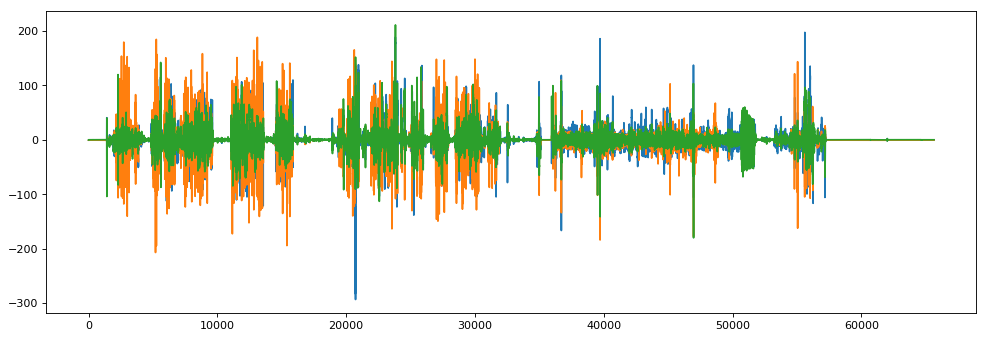

time: 374 ms


In [347]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gyr_data["x-axis (deg/s)"])
plt.plot(gyr_data["y-axis (deg/s)"])
plt.plot(gyr_data["z-axis (deg/s)"])

print(gyr_data.shape)

plt.show()

<Figure size 1200x400 with 0 Axes>

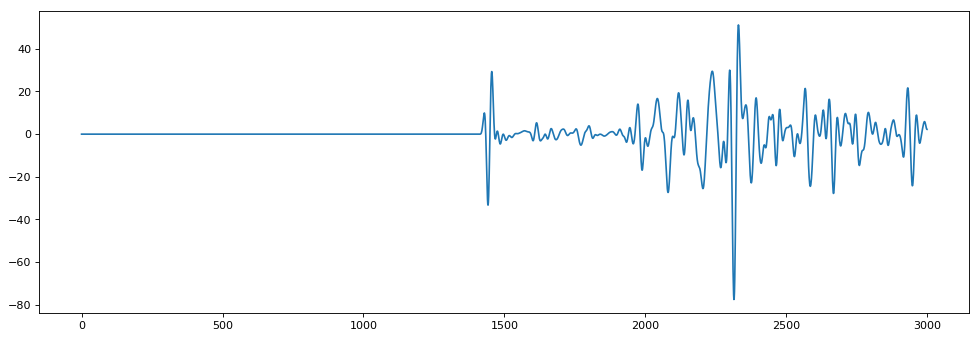

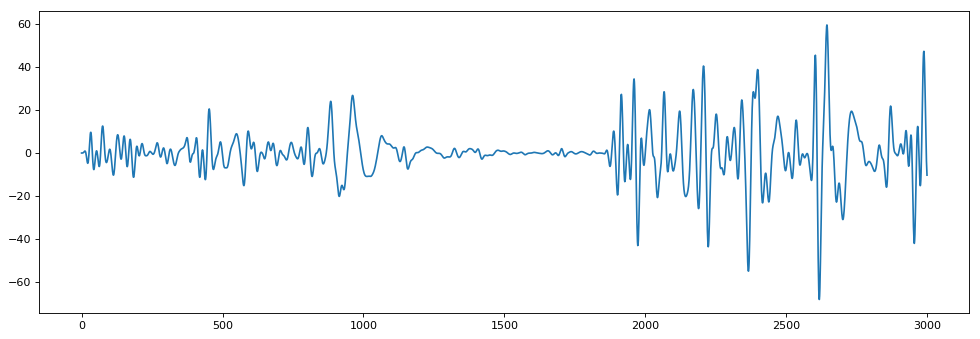

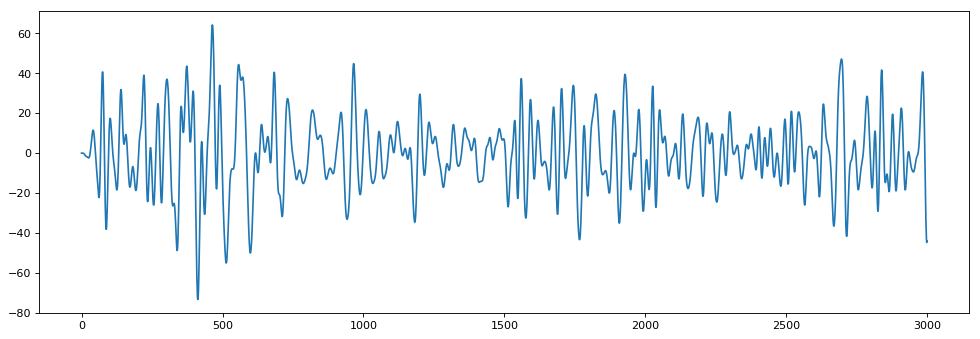

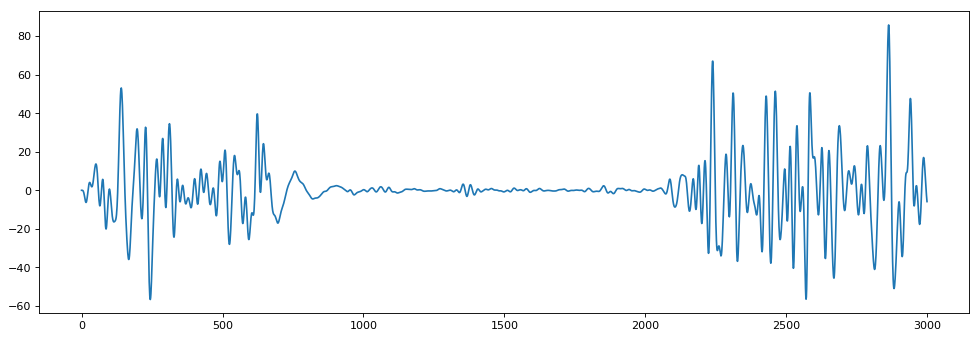

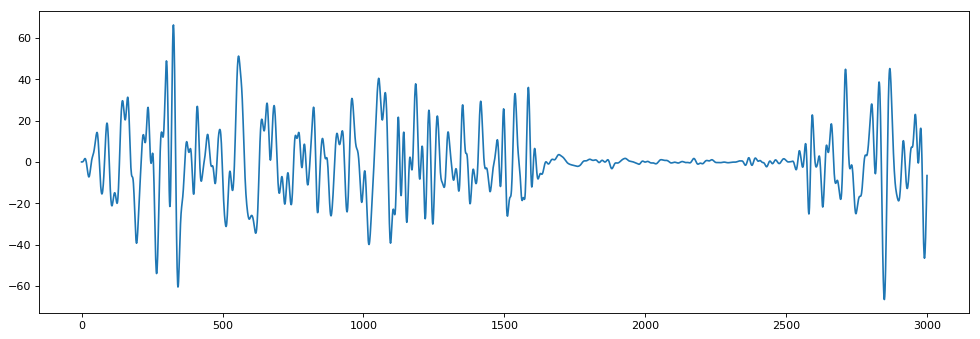

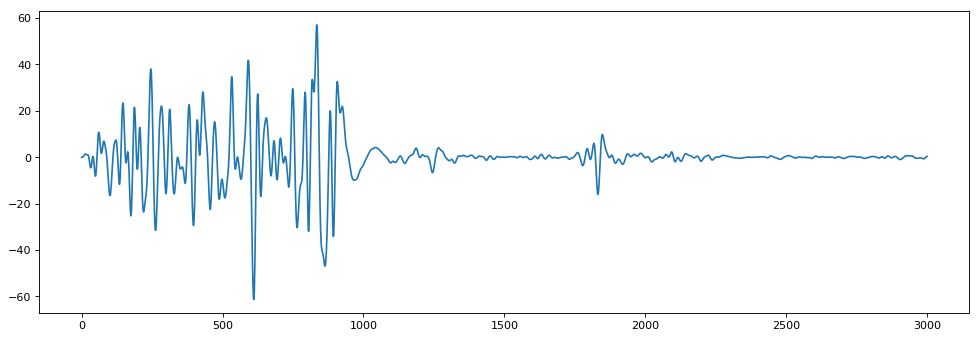

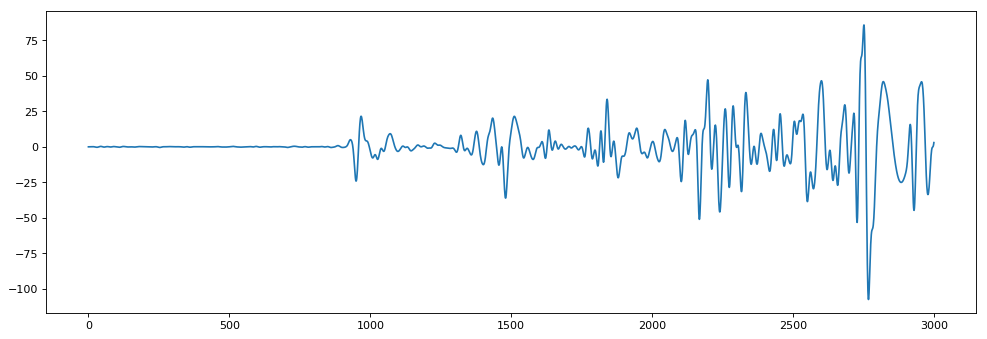

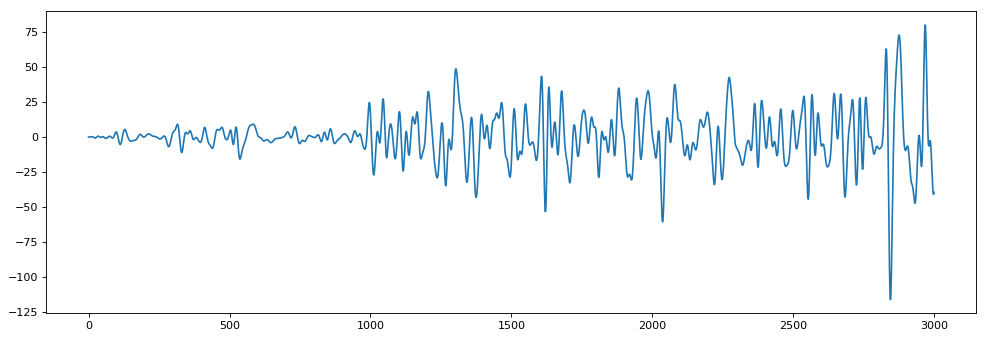

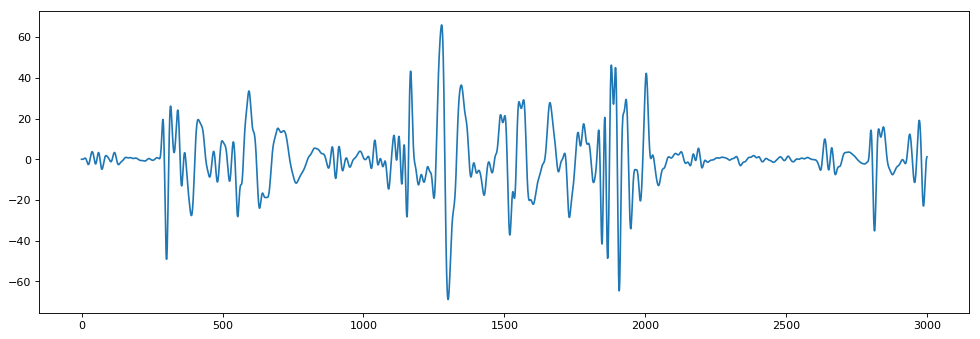

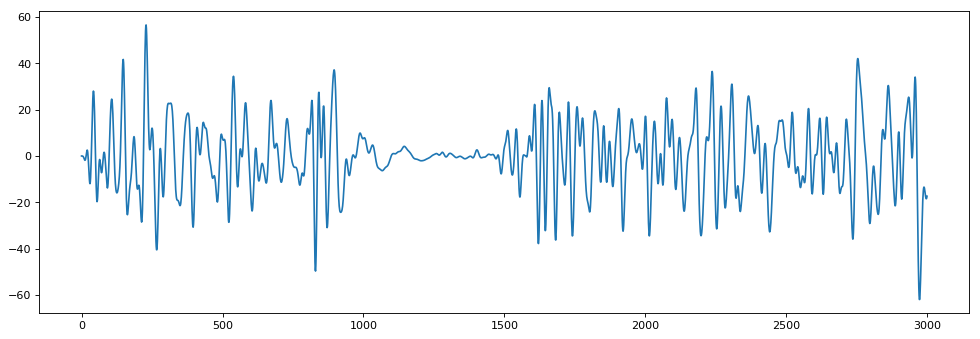

time: 2.19 s


In [243]:
step = 1
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

fs = 14000.0
lowcut = 100
highcut = 700
plot_seconds = 120
plot_samples = int((plot_seconds * 1000)/gyr_frequency)

for i in range(0, 10):
    figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    filtered_data_x = butter_bandpass_filter(gyr_data["x-axis (deg/s)"][i*plot_samples : (i + 1)*plot_samples], lowcut, highcut, fs, order=6)
    plt.plot(filtered_data_x)
    plt.show()

### Pressure

In [107]:
pressure_data_filename = 'neureuth_pres_1'
pres_frequency = calcFrequency(250)

time: 727 µs


In [108]:
pres_data = pd.read_csv('../data/raw/' + pressure_data_filename + '.csv')
pres_data.head()

,epoch (ms),time (01:00),elapsed (s),pressure (Pa)
0,1558198207146,2019-05-18T18:50:07.146,0.000,86467.172
1,1558198211157,2019-05-18T18:50:11.157,4.011,86466.531
2,1558198215168,2019-05-18T18:50:15.168,8.022,86462.641
3,1558198219180,2019-05-18T18:50:19.180,12.034,86467.195
4,1558198223191,2019-05-18T18:50:23.191,16.045,86469.203


time: 9.5 ms


(654, 4)


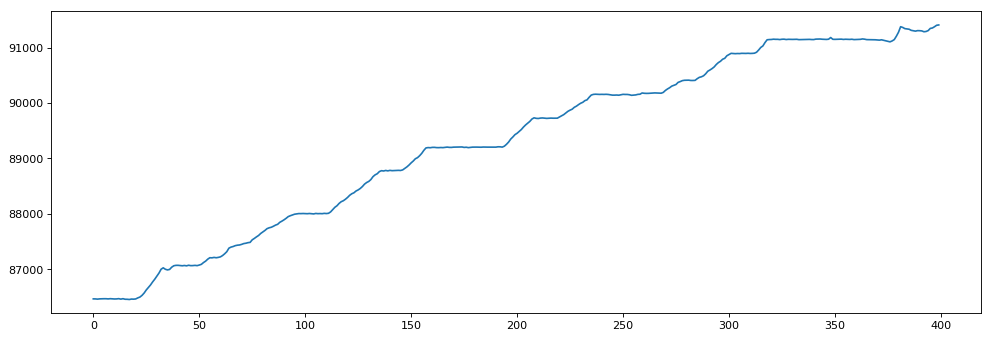

time: 215 ms


In [201]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pres_data["pressure (Pa)"][:400])

print(pres_data.shape)
plt.show()